In [1]:
import pickle
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline

# Calibration of amino acids in explcit water
### With self adjusted mixture sampling

A quick view of the NCMC calibration of the titratable amino acides, along with the printing of the final weights at a target pH. In this notebook, the final weights from the previous set of calibration simulations were used to initialize the weights.

#### Simulation details
* Total number of steps = 4000
* 'burn-in' length = 2000
* b = 0.5
* NCMC steps at 1fs = 10000 at 1fs each (10ps per iteration)
* MD steps per iteration = 500 at 2fs each (1ps per iteration)

### Target populations

Loading the target populations of the residues so that the SAMS weights can be adjusted. Picking pH=7.4 for now, which is the pH of blood plasma.

In [2]:
import protons.calibration as cali

g_initial = {'lys': [0.0, -6.8],
             'tyr': [0.0, 126.7],
             'as4': [0.0, -63.2, -65.1, -63.1, -69.5],
             'gl4': [0.0, -33.8, -39.7, -36.1, -38.5],
             'hip': [0.0, 27.5, 29.6],
             'cys': [0.0, 154.4]}

target_populations = {}
residues = ('as4', 'gl4', 'hip', 'cys', 'lys', 'tyr')

for res in ('as4', 'gl4', 'hip', 'cys', 'lys', 'tyr'):
    target = np.log(np.array(cali.AmberCalibrationSystem.supported_aminoacids[res](7.4).populations()))
    g_initial[res] = g_initial[res] - target

In [3]:
g_initial

{'as4': array([  3.98027947e-04,  -5.39845183e+01,  -5.58845183e+01,
         -5.38845183e+01,  -6.02845183e+01]),
 'cys': array([  7.64357397e-02,   1.57009279e+02]),
 'gl4': array([  9.99500333e-04,  -2.55049509e+01,  -3.14049509e+01,
         -2.78049509e+01,  -3.02049509e+01]),
 'hip': array([  2.39229276,  27.81996618,  31.30151723]),
 'lys': array([ 0.0009995 ,  0.10875478]),
 'tyr': array([  6.28975142e-03,   1.31771977e+02])}

## Loading data from NCMC calibration of TYR

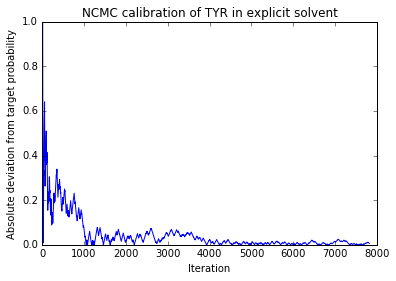

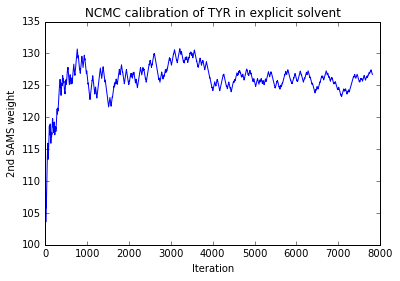

In [3]:
deviation, weights, work, times = pickle.load(open('tyr/out3.pickle','rb'))

plt.plot(range(len(deviation)), deviation)
plt.xlabel('Iteration')
plt.ylabel('Absolute deviation from target probability')
plt.title('NCMC calibration of TYR in explicit solvent')
plt.show()

g_k = [w[1] for w in weights]

plt.plot(range(len(g_k)), g_k)
plt.xlabel('Iteration')
plt.ylabel('2nd SAMS weight')
plt.title('NCMC calibration of TYR in explicit solvent')
plt.show()

### Final weights, accounting for target populations

In [4]:
print(weights[-1] - target_populations['tyr'])

[  6.28975142e-03   1.31788626e+02]


## Loading data from NCMC calibration of AS4

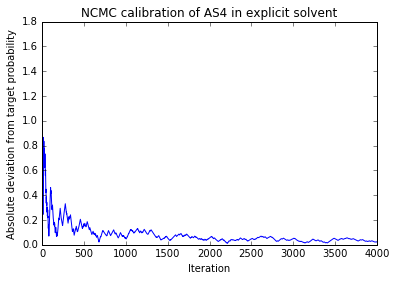

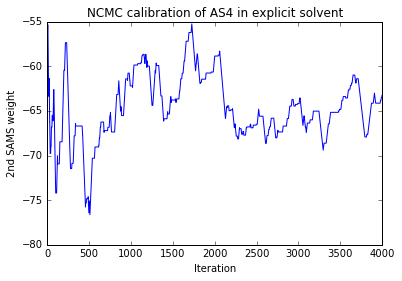

In [5]:
deviation, weights, work, times = pickle.load(open('as4/out3.pickle','rb'))

plt.plot(range(len(deviation)), deviation)
plt.xlabel('Iteration')
plt.ylabel('Absolute deviation from target probability')
plt.title('NCMC calibration of AS4 in explicit solvent')
plt.show()

g_k = [w[1] for w in weights]

plt.plot(range(len(g_k)), g_k)
plt.xlabel('Iteration')
plt.ylabel('2nd SAMS weight')
plt.title('NCMC calibration of AS4 in explicit solvent')
plt.show()

### Final weights, accounting for target populations

In [6]:
print(weights[-1] - target_populations['as4'])

[  3.98027947e-04  -5.40483040e+01  -5.58990774e+01  -5.38605081e+01
  -6.02798849e+01]


## Loading data from NCMC calibration of GL4

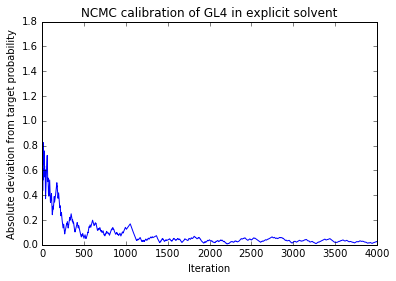

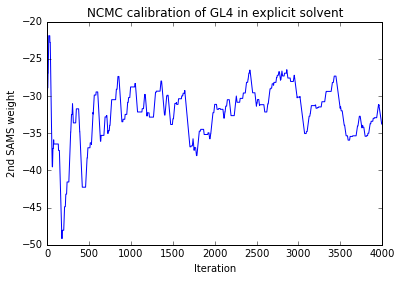

In [7]:
deviation, weights, work, times = pickle.load(open('gl4/out3.pickle','rb'))

plt.plot(range(len(deviation)), deviation)
plt.xlabel('Iteration')
plt.ylabel('Absolute deviation from target probability')
plt.title('NCMC calibration of GL4 in explicit solvent')
plt.show()

g_k = [w[1] for w in weights]

plt.plot(range(len(g_k)), g_k)
plt.xlabel('Iteration')
plt.ylabel('2nd SAMS weight')
plt.title('NCMC calibration of GL4 in explicit solvent')
plt.show()

### Final weights, accounting for target populations

In [8]:
print(weights[-1] - target_populations['gl4'])

[  9.99500333e-04  -2.54859994e+01  -3.14177842e+01  -2.78515596e+01
  -3.02167880e+01]


## Loading data from NCMC calibration of LYS

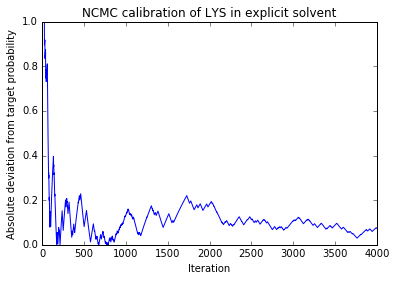

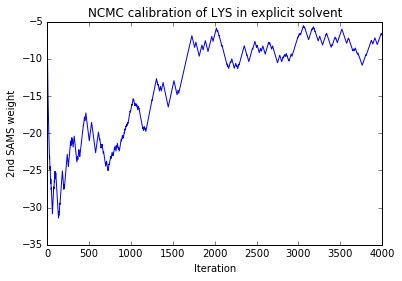

In [9]:
deviation, weights, work, times = pickle.load(open('lys/out3.pickle','rb'))

plt.plot(range(len(deviation)), deviation)
plt.xlabel('Iteration')
plt.ylabel('Absolute deviation from target probability')
plt.title('NCMC calibration of LYS in explicit solvent')
plt.show()

g_k = [w[1] for w in weights]

plt.plot(range(len(g_k)), g_k)
plt.xlabel('Iteration')
plt.ylabel('2nd SAMS weight')
plt.title('NCMC calibration of LYS in explicit solvent')
plt.show()

### Final weights, accounting for target populations

In [10]:
print(weights[-1] - target_populations['lys'])

[ 0.0009995   0.06608932]


## Loading data from NCMC calibration of HIP

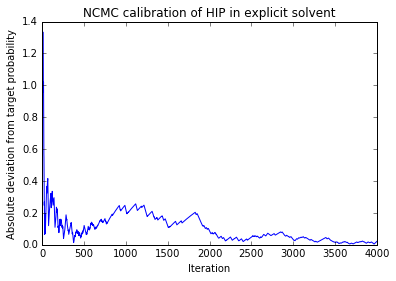

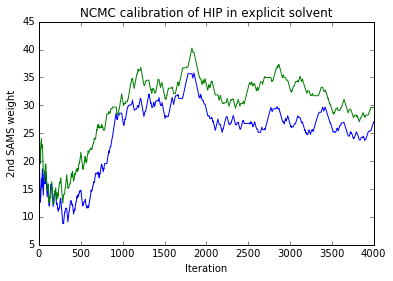

In [7]:
deviation, weights, work, times = pickle.load(open('hip/out3.pickle','rb'))

plt.plot(range(len(deviation)), deviation)
plt.xlabel('Iteration')
plt.ylabel('Absolute deviation from target probability')
plt.title('NCMC calibration of HIP in explicit solvent')
plt.show()

g_k1 = [w[1] for w in weights]
g_k2 = [w[2] for w in weights]

plt.plot(range(len(g_k1)), g_k1)
plt.plot(range(len(g_k2)), g_k2)
plt.xlabel('Iteration')
plt.ylabel('2nd SAMS weight')
plt.title('NCMC calibration of HIP in explicit solvent')
plt.show()

### Final weights, accounting for target populations

In [12]:
print(weights[-1] - target_populations['hip'])

[  2.39229276  27.36659311  31.29454162]


## CYS

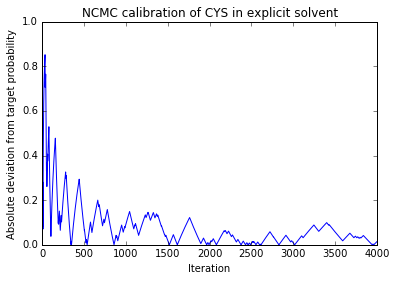

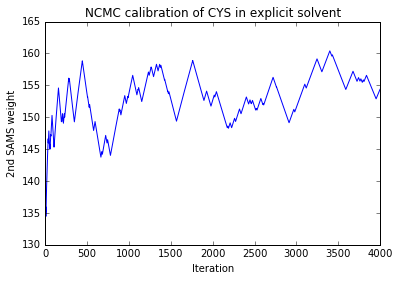

In [13]:
deviation, weights, work, times = pickle.load(open('cys/out3.pickle','rb'))

plt.plot(range(len(deviation)), deviation)
plt.xlabel('Iteration')
plt.ylabel('Absolute deviation from target probability')
plt.title('NCMC calibration of CYS in explicit solvent')
plt.show()

g_k = [w[1] for w in weights]

plt.plot(range(len(g_k)), g_k)
plt.xlabel('Iteration')
plt.ylabel('2nd SAMS weight')
plt.title('NCMC calibration of CYS in explicit solvent')
plt.show()

### Final weights, accounting for target populations

In [14]:
print(weights[-1] - target_populations['cys'])

[  7.64357397e-02   1.56989728e+02]
